In [7]:
import numpy as np
import aniposelib
import toml
import pandas as pd
from aniposelib.boards import CharucoBoard, Checkerboard
from aniposelib.cameras import Camera, CameraGroup
from aniposelib.utils import load_pose2d_fnames

import os

In [8]:
# calibrate the cameras for 3d

do_cali = 0

#vidnames = [['camera-1_new_position_20221107.mp4'],
#            ['camera-2_new_position_20221107.mp4'],
#            ['camera-3_new_position_20221107.mp4']]
vidnames = [['camera-1_new_position_20221109_merge.mp4'],
            ['camera-2_new_position_20221109_merge.mp4'],
            ['camera-3_new_position_20221109_merge.mp4']]

cam_names = ['1', '2', '3']

n_cams = len(vidnames)

board = Checkerboard(8, 6,
                     square_length=1, # here, in mm but any unit works
                     manually_verify=False)


# the videos provided are fisheye, so we need the fisheye option
cgroup = CameraGroup.from_names(cam_names, fisheye=False)



In [9]:
if do_cali: 
    # this will take about 15 minutes (mostly due to detection)
    # it will detect the charuco board in the videos,
    # then calibrate the cameras based on the detections, using iterative bundle adjustment
    cgroup.calibrate_videos(vidnames, board)

    # if you need to save and load
    # example saving and loading for later
    cgroup.dump('calibration.toml')

In [10]:
if not do_cali:
    ## example of loading calibration from a file
    ## you can also load the provided file if you don't want to wait 15 minutes
    cgroup = CameraGroup.load('calibration.toml')


In [11]:
lever_locs_all = {'camera-1':{('dodson'):np.array([645, 600]),('scorch'):np.array([425, 435])},
                  'camera-2':{('dodson'):np.array([1335,715]),('scorch'):np.array([550, 715])},
                  'camera-3':{('dodson'):np.array([1580,440]),('scorch'):np.array([1296,540])}}
tube_locs_all = {'camera-1':{('dodson'):np.array([1350,630]),('scorch'):np.array([555, 345])},
                 'camera-2':{('dodson'):np.array([1550,515]),('scorch'):np.array([350, 515])},
                 'camera-3':{('dodson'):np.array([1470,375]),('scorch'):np.array([805,475])}}
boxCorner1_locs_all = {'camera-1':{('dodson'):np.array([673, 421]),('scorch'):np.array([659, 408])},
                       'camera-2':{('dodson'):np.array([936, 527]),('scorch'):np.array([902, 526])},
                       'camera-3':{('dodson'):np.array([1323,395]),('scorch'):np.array([1310,398])}}
boxCorner2_locs_all = {'camera-1':{('dodson'):np.array([700, 682]),('scorch'):np.array([679, 665])},
                       'camera-2':{('dodson'):np.array([951, 773]),('scorch'):np.array([912, 775])},
                       'camera-3':{('dodson'):np.array([1285,634]),('scorch'):np.array([1270,641])}}
boxCorner3_locs_all = {'camera-1':{('dodson'):np.array([1232,1070]),('scorch'):np.array([501,513])},
                       'camera-2':{('dodson'):np.array([1599, 748]),('scorch'):np.array([236,791])},
                       'camera-3':{('dodson'):np.array([1525, 528]),('scorch'):np.array([734,864])}}
boxCorner4_locs_all = {'camera-1':{('dodson'):np.array([1585, 698]),('scorch'):np.array([842,446])},
                       'camera-2':{('dodson'):np.array([1343, 424]),('scorch'):np.array([502,461])},
                       'camera-3':{('dodson'):np.array([1190, 426]),('scorch'):np.array([511,581])}}

In [23]:
## example triangulation without filtering, should take < 15 seconds
date_tgt = '20221128'
animal1 = 'Eddie'
animal2 = 'Sparkle'
#date_tgt = '20230209'
#animal1 = 'Ginger'
#animal2 = 'Kanga'
singlecam_ana_type = "DLC_dlcrnetms5_marmoset_tracking_with_middle_cameraSep1shuffle1_150000"

current_dir = os.getcwd()
add_date_dir = current_dir+'/anipose_3d_h5_files/'+date_tgt+'_'+animal1+'_'+animal2
bodyparts_3d_anipose_file = add_date_dir+'/'+date_tgt+'_'+animal1+'_'+animal2+'_anipose.h5'
if os.path.exists(bodyparts_3d_anipose_file):
    do_3dconstruct = 0
else:
    do_3dconstruct = 1
# do_3dconstruct=1
    
if do_3dconstruct:   

    twocamera_videos_cam12 = "/gpfs/gibbs/pi/jadi/VideoTracker_SocialInter/test_video_cooperative_task_3d/"+date_tgt+"_"+animal1+"_"+animal2+"_camera12/"
    twocamera_videos_cam23 = "/gpfs/gibbs/pi/jadi/VideoTracker_SocialInter/test_video_cooperative_task_3d/"+date_tgt+"_"+animal1+"_"+animal2+"_camera23/"

    bodyparts_cam1_cam12 = twocamera_videos_cam12+date_tgt+"_"+animal1+"_"+animal2+"_camera-1"+singlecam_ana_type+"_el_filtered.h5"
    bodyparts_cam2_cam12 = twocamera_videos_cam12+date_tgt+"_"+animal1+"_"+animal2+"_camera-2"+singlecam_ana_type+"_el_filtered.h5"
    bodyparts_cam3_cam23 = twocamera_videos_cam23+date_tgt+"_"+animal1+"_"+animal2+"_camera-3"+singlecam_ana_type+"_el_filtered.h5"

    bodyparts_3d_cam12_DLC = twocamera_videos_cam12+date_tgt+"_"+animal1+"_"+animal2+"_weikang.h5"
    bodyparts_3d_cam23_DLC = twocamera_videos_cam23+date_tgt+"_"+animal1+"_"+animal2+"_weikang.h5"


    ## save the the h5 file separately for each animals and save them in the same folder for future purpose

    # animal 1 - "dodson"

    # dodson h5 files
    bodyparts_cam1_cam12_dodson = twocamera_videos_cam12+date_tgt+"_"+animal1+"_"+animal2+"_camera-1"+singlecam_ana_type+"_el_filtered_dodson.h5"
    bodyparts_cam2_cam12_dodson = twocamera_videos_cam12+date_tgt+"_"+animal1+"_"+animal2+"_camera-2"+singlecam_ana_type+"_el_filtered_dodson.h5"
    bodyparts_cam3_cam23_dodson = twocamera_videos_cam23+date_tgt+"_"+animal1+"_"+animal2+"_camera-3"+singlecam_ana_type+"_el_filtered_dodson.h5"

    # cam1 dodson
    bodyparts_cam1_cam12_data = pd.read_hdf(bodyparts_cam1_cam12)
    bodyparts_cam1_cam12_dodson_data = {}
    bodyparts_cam1_cam12_dodson_data[singlecam_ana_type]=bodyparts_cam1_cam12_data.loc[:,(singlecam_ana_type,'dodson')]
    bodyparts_cam1_cam12_dodson_data=pd.concat(bodyparts_cam1_cam12_dodson_data, axis=1)
    # add lever
    lever_x = np.ones((1,np.shape(bodyparts_cam1_cam12_dodson_data)[0]))*lever_locs_all['camera-1']['dodson'][0]
    lever_y = np.ones((1,np.shape(bodyparts_cam1_cam12_dodson_data)[0]))*lever_locs_all['camera-1']['dodson'][1]
    lever_likelihood = np.ones((1,np.shape(bodyparts_cam1_cam12_dodson_data)[0]))
    bodyparts_cam1_cam12_dodson_data[(singlecam_ana_type,'lever','x')]=lever_x[0]
    bodyparts_cam1_cam12_dodson_data[(singlecam_ana_type,'lever','y')]=lever_y[0]
    bodyparts_cam1_cam12_dodson_data[(singlecam_ana_type,'lever','likelihood')]=lever_likelihood[0]
    # add tube
    tube_x = np.ones((1,np.shape(bodyparts_cam1_cam12_dodson_data)[0]))*tube_locs_all['camera-1']['dodson'][0]
    tube_y = np.ones((1,np.shape(bodyparts_cam1_cam12_dodson_data)[0]))*tube_locs_all['camera-1']['dodson'][1]
    tube_likelihood = np.ones((1,np.shape(bodyparts_cam1_cam12_dodson_data)[0]))
    bodyparts_cam1_cam12_dodson_data[(singlecam_ana_type,'tube','x')]=tube_x[0]
    bodyparts_cam1_cam12_dodson_data[(singlecam_ana_type,'tube','y')]=tube_y[0]
    bodyparts_cam1_cam12_dodson_data[(singlecam_ana_type,'tube','likelihood')]=tube_likelihood[0]
    #
    bodyparts_cam1_cam12_dodson_data.to_hdf(bodyparts_cam1_cam12_dodson,key='tracks')

    # cam2 dodson
    bodyparts_cam2_cam12_data = pd.read_hdf(bodyparts_cam2_cam12)
    bodyparts_cam2_cam12_dodson_data = {}
    bodyparts_cam2_cam12_dodson_data[singlecam_ana_type]=bodyparts_cam2_cam12_data.loc[:,(singlecam_ana_type,'dodson')]
    bodyparts_cam2_cam12_dodson_data=pd.concat(bodyparts_cam2_cam12_dodson_data, axis=1)
    # add lever
    lever_x = np.ones((1,np.shape(bodyparts_cam2_cam12_dodson_data)[0]))*lever_locs_all['camera-2']['dodson'][0]
    lever_y = np.ones((1,np.shape(bodyparts_cam2_cam12_dodson_data)[0]))*lever_locs_all['camera-2']['dodson'][1]
    lever_likelihood = np.ones((1,np.shape(bodyparts_cam2_cam12_dodson_data)[0]))
    bodyparts_cam2_cam12_dodson_data[(singlecam_ana_type,'lever','x')]=lever_x[0]
    bodyparts_cam2_cam12_dodson_data[(singlecam_ana_type,'lever','y')]=lever_y[0]
    bodyparts_cam2_cam12_dodson_data[(singlecam_ana_type,'lever','likelihood')]=lever_likelihood[0]
    # add tube
    tube_x = np.ones((1,np.shape(bodyparts_cam2_cam12_dodson_data)[0]))*tube_locs_all['camera-2']['dodson'][0]
    tube_y = np.ones((1,np.shape(bodyparts_cam2_cam12_dodson_data)[0]))*tube_locs_all['camera-2']['dodson'][1]
    tube_likelihood = np.ones((1,np.shape(bodyparts_cam2_cam12_dodson_data)[0]))
    bodyparts_cam2_cam12_dodson_data[(singlecam_ana_type,'tube','x')]=tube_x[0]
    bodyparts_cam2_cam12_dodson_data[(singlecam_ana_type,'tube','y')]=tube_y[0]
    bodyparts_cam2_cam12_dodson_data[(singlecam_ana_type,'tube','likelihood')]=tube_likelihood[0]
    #
    bodyparts_cam2_cam12_dodson_data.to_hdf(bodyparts_cam2_cam12_dodson,key='tracks')

    # cam3 dodson
    bodyparts_cam3_cam23_data = pd.read_hdf(bodyparts_cam3_cam23)
    bodyparts_cam3_cam23_dodson_data = {}
    bodyparts_cam3_cam23_dodson_data[singlecam_ana_type]=bodyparts_cam3_cam23_data.loc[:,(singlecam_ana_type,'dodson')]
    bodyparts_cam3_cam23_dodson_data=pd.concat(bodyparts_cam3_cam23_dodson_data, axis=1)
    # add lever
    lever_x = np.ones((1,np.shape(bodyparts_cam3_cam23_dodson_data)[0]))*lever_locs_all['camera-3']['dodson'][0]
    lever_y = np.ones((1,np.shape(bodyparts_cam3_cam23_dodson_data)[0]))*lever_locs_all['camera-3']['dodson'][1]
    lever_likelihood = np.ones((1,np.shape(bodyparts_cam3_cam23_dodson_data)[0]))
    bodyparts_cam3_cam23_dodson_data[(singlecam_ana_type,'lever','x')]=lever_x[0]
    bodyparts_cam3_cam23_dodson_data[(singlecam_ana_type,'lever','y')]=lever_y[0]
    bodyparts_cam3_cam23_dodson_data[(singlecam_ana_type,'lever','likelihood')]=lever_likelihood[0]
    # add tube
    tube_x = np.ones((1,np.shape(bodyparts_cam3_cam23_dodson_data)[0]))*tube_locs_all['camera-3']['dodson'][0]
    tube_y = np.ones((1,np.shape(bodyparts_cam3_cam23_dodson_data)[0]))*tube_locs_all['camera-3']['dodson'][1]
    tube_likelihood = np.ones((1,np.shape(bodyparts_cam3_cam23_dodson_data)[0]))
    bodyparts_cam3_cam23_dodson_data[(singlecam_ana_type,'tube','x')]=tube_x[0]
    bodyparts_cam3_cam23_dodson_data[(singlecam_ana_type,'tube','y')]=tube_y[0]
    bodyparts_cam3_cam23_dodson_data[(singlecam_ana_type,'tube','likelihood')]=tube_likelihood[0]
    #
    bodyparts_cam3_cam23_dodson_data.to_hdf(bodyparts_cam3_cam23_dodson,key='tracks')


    # animal 2 - "scorch"

    # scorch h5 files
    bodyparts_cam1_cam12_scorch = twocamera_videos_cam12+date_tgt+"_"+animal1+"_"+animal2+"_camera-1"+singlecam_ana_type+"_el_filtered_scorch.h5"
    bodyparts_cam2_cam12_scorch = twocamera_videos_cam12+date_tgt+"_"+animal1+"_"+animal2+"_camera-2"+singlecam_ana_type+"_el_filtered_scorch.h5"
    bodyparts_cam3_cam23_scorch = twocamera_videos_cam23+date_tgt+"_"+animal1+"_"+animal2+"_camera-3"+singlecam_ana_type+"_el_filtered_scorch.h5"

    # cam1 scorch
    bodyparts_cam1_cam12_data = pd.read_hdf(bodyparts_cam1_cam12)
    bodyparts_cam1_cam12_scorch_data = {}
    bodyparts_cam1_cam12_scorch_data[singlecam_ana_type]=bodyparts_cam1_cam12_data.loc[:,(singlecam_ana_type,'scorch')]
    bodyparts_cam1_cam12_scorch_data=pd.concat(bodyparts_cam1_cam12_scorch_data, axis=1)
    # add lever
    lever_x = np.ones((1,np.shape(bodyparts_cam1_cam12_scorch_data)[0]))*lever_locs_all['camera-1']['scorch'][0]
    lever_y = np.ones((1,np.shape(bodyparts_cam1_cam12_scorch_data)[0]))*lever_locs_all['camera-1']['scorch'][1]
    lever_likelihood = np.ones((1,np.shape(bodyparts_cam1_cam12_scorch_data)[0]))
    bodyparts_cam1_cam12_scorch_data[(singlecam_ana_type,'lever','x')]=lever_x[0]
    bodyparts_cam1_cam12_scorch_data[(singlecam_ana_type,'lever','y')]=lever_y[0]
    bodyparts_cam1_cam12_scorch_data[(singlecam_ana_type,'lever','likelihood')]=lever_likelihood[0]
    # add tube
    tube_x = np.ones((1,np.shape(bodyparts_cam1_cam12_scorch_data)[0]))*tube_locs_all['camera-1']['scorch'][0]
    tube_y = np.ones((1,np.shape(bodyparts_cam1_cam12_scorch_data)[0]))*tube_locs_all['camera-1']['scorch'][1]
    tube_likelihood = np.ones((1,np.shape(bodyparts_cam1_cam12_scorch_data)[0]))
    bodyparts_cam1_cam12_scorch_data[(singlecam_ana_type,'tube','x')]=tube_x[0]
    bodyparts_cam1_cam12_scorch_data[(singlecam_ana_type,'tube','y')]=tube_y[0]
    bodyparts_cam1_cam12_scorch_data[(singlecam_ana_type,'tube','likelihood')]=tube_likelihood[0]
    #
    bodyparts_cam1_cam12_scorch_data.to_hdf(bodyparts_cam1_cam12_scorch,key='tracks')

    # cam2 scorch
    bodyparts_cam2_cam12_data = pd.read_hdf(bodyparts_cam2_cam12)
    bodyparts_cam2_cam12_scorch_data = {}
    bodyparts_cam2_cam12_scorch_data[singlecam_ana_type]=bodyparts_cam2_cam12_data.loc[:,(singlecam_ana_type,'scorch')]
    bodyparts_cam2_cam12_scorch_data=pd.concat(bodyparts_cam2_cam12_scorch_data, axis=1)
    # add lever
    lever_x = np.ones((1,np.shape(bodyparts_cam2_cam12_scorch_data)[0]))*lever_locs_all['camera-2']['scorch'][0]
    lever_y = np.ones((1,np.shape(bodyparts_cam2_cam12_scorch_data)[0]))*lever_locs_all['camera-2']['scorch'][1]
    lever_likelihood = np.ones((1,np.shape(bodyparts_cam2_cam12_scorch_data)[0]))
    bodyparts_cam2_cam12_scorch_data[(singlecam_ana_type,'lever','x')]=lever_x[0]
    bodyparts_cam2_cam12_scorch_data[(singlecam_ana_type,'lever','y')]=lever_y[0]
    bodyparts_cam2_cam12_scorch_data[(singlecam_ana_type,'lever','likelihood')]=lever_likelihood[0]
    # add tube
    tube_x = np.ones((1,np.shape(bodyparts_cam2_cam12_scorch_data)[0]))*tube_locs_all['camera-2']['scorch'][0]
    tube_y = np.ones((1,np.shape(bodyparts_cam2_cam12_scorch_data)[0]))*tube_locs_all['camera-2']['scorch'][1]
    tube_likelihood = np.ones((1,np.shape(bodyparts_cam2_cam12_scorch_data)[0]))
    bodyparts_cam2_cam12_scorch_data[(singlecam_ana_type,'tube','x')]=tube_x[0]
    bodyparts_cam2_cam12_scorch_data[(singlecam_ana_type,'tube','y')]=tube_y[0]
    bodyparts_cam2_cam12_scorch_data[(singlecam_ana_type,'tube','likelihood')]=tube_likelihood[0]
    #
    bodyparts_cam2_cam12_scorch_data.to_hdf(bodyparts_cam2_cam12_scorch,key='tracks')

    # cam3 scorch
    bodyparts_cam3_cam23_data = pd.read_hdf(bodyparts_cam3_cam23)
    bodyparts_cam3_cam23_scorch_data = {}
    bodyparts_cam3_cam23_scorch_data[singlecam_ana_type]=bodyparts_cam3_cam23_data.loc[:,(singlecam_ana_type,'scorch')]
    bodyparts_cam3_cam23_scorch_data=pd.concat(bodyparts_cam3_cam23_scorch_data, axis=1)
    # add lever
    lever_x = np.ones((1,np.shape(bodyparts_cam3_cam23_scorch_data)[0]))*lever_locs_all['camera-3']['scorch'][0]
    lever_y = np.ones((1,np.shape(bodyparts_cam3_cam23_scorch_data)[0]))*lever_locs_all['camera-3']['scorch'][1]
    lever_likelihood = np.ones((1,np.shape(bodyparts_cam3_cam23_scorch_data)[0]))
    bodyparts_cam3_cam23_scorch_data[(singlecam_ana_type,'lever','x')]=lever_x[0]
    bodyparts_cam3_cam23_scorch_data[(singlecam_ana_type,'lever','y')]=lever_y[0]
    bodyparts_cam3_cam23_scorch_data[(singlecam_ana_type,'lever','likelihood')]=lever_likelihood[0]
    # add tube
    tube_x = np.ones((1,np.shape(bodyparts_cam3_cam23_scorch_data)[0]))*tube_locs_all['camera-3']['scorch'][0]
    tube_y = np.ones((1,np.shape(bodyparts_cam3_cam23_scorch_data)[0]))*tube_locs_all['camera-3']['scorch'][1]
    tube_likelihood = np.ones((1,np.shape(bodyparts_cam3_cam23_scorch_data)[0]))
    bodyparts_cam3_cam23_scorch_data[(singlecam_ana_type,'tube','x')]=tube_x[0]
    bodyparts_cam3_cam23_scorch_data[(singlecam_ana_type,'tube','y')]=tube_y[0]
    bodyparts_cam3_cam23_scorch_data[(singlecam_ana_type,'tube','likelihood')]=tube_likelihood[0]
    #
    bodyparts_cam3_cam23_scorch_data.to_hdf(bodyparts_cam3_cam23_scorch,key='tracks')

In [24]:
## read the 3d recontruction h5 file
if do_3dconstruct:
    bodyparts_3d_cam12_DLC_data = pd.read_hdf(bodyparts_3d_cam12_DLC)
    bodyparts_3d_cam12_DLC_data.head()

In [25]:
## triangulation without filtering, should take < 15 seconds
if do_3dconstruct:
    # for the animal 1 - dodson
    fname_dict = {
        '1': bodyparts_cam1_cam12_dodson,
        '2': bodyparts_cam2_cam12_dodson,
        '3': bodyparts_cam3_cam23_dodson,
    }

    d = load_pose2d_fnames(fname_dict, cam_names=cgroup.get_names())

    score_threshold = 0.1

    n_cams, n_points, n_joints, _ = d['points'].shape
    points = d['points']
    scores = d['scores']

    bodyparts = d['bodyparts']

    # remove points that are below threshold
    points[scores < score_threshold] = np.nan

    points_flat = points.reshape(n_cams, -1, 2)
    scores_flat = scores.reshape(n_cams, -1)

    p3ds_flat = cgroup.triangulate(points_flat, progress=True)
    reprojerr_flat = cgroup.reprojection_error(p3ds_flat, points_flat, mean=True)

    p3ds = p3ds_flat.reshape(n_points, n_joints, 3)
    reprojerr = reprojerr_flat.reshape(n_points, n_joints)


In [26]:
## save the new files - animal 1 dodson
if do_3dconstruct:
    bodyparts_3d_dodson_anipose = {}
    nbodyparts = np.shape(bodyparts)[0]
    for ibodypart in np.arange(0,nbodyparts,1):
        # remove outlier
        ind_outlier_x = (p3ds[:,ibodypart,0]<(np.nanmean(p3ds[:,ibodypart,0])-2*np.nanstd(p3ds[:,ibodypart,0])))|(p3ds[:,ibodypart,0]>(np.nanmean(p3ds[:,ibodypart,0])+2*np.nanstd(p3ds[:,ibodypart,0])))
        p3ds[ind_outlier_x,ibodypart,0]=np.nan
        ind_outlier_y = (p3ds[:,ibodypart,1]<(np.nanmean(p3ds[:,ibodypart,1])-2*np.nanstd(p3ds[:,ibodypart,1])))|(p3ds[:,ibodypart,1]>(np.nanmean(p3ds[:,ibodypart,1])+2*np.nanstd(p3ds[:,ibodypart,1])))
        p3ds[ind_outlier_y,ibodypart,1]=np.nan
        ind_outlier_z = (p3ds[:,ibodypart,2]<(np.nanmean(p3ds[:,ibodypart,2])-2*np.nanstd(p3ds[:,ibodypart,2])))|(p3ds[:,ibodypart,2]>(np.nanmean(p3ds[:,ibodypart,2])+2*np.nanstd(p3ds[:,ibodypart,2])))
        p3ds[ind_outlier_z,ibodypart,2]=np.nan

        bodyparts_3d_dodson_anipose[('weikang','dodson',bodyparts[ibodypart],'x')] = p3ds[:,ibodypart, 0]
        bodyparts_3d_dodson_anipose[('weikang','dodson',bodyparts[ibodypart],'y')] = p3ds[:,ibodypart, 1]
        bodyparts_3d_dodson_anipose[('weikang','dodson',bodyparts[ibodypart],'z')] = p3ds[:,ibodypart, 2]
    bodyparts_3d_dodson_anipose = pd.DataFrame(bodyparts_3d_dodson_anipose)

In [27]:
## triangulation without filtering, should take < 15 seconds
if do_3dconstruct:
    # for the animal 1 - scorch
    fname_dict = {
        '1': bodyparts_cam1_cam12_scorch,
        '2': bodyparts_cam2_cam12_scorch,
        '3': bodyparts_cam3_cam23_scorch,
    }

    d = load_pose2d_fnames(fname_dict, cam_names=cgroup.get_names())

    score_threshold = 0.1

    n_cams, n_points, n_joints, _ = d['points'].shape
    points = d['points']
    scores = d['scores']

    bodyparts = d['bodyparts']

    # remove points that are below threshold
    points[scores < score_threshold] = np.nan

    points_flat = points.reshape(n_cams, -1, 2)
    scores_flat = scores.reshape(n_cams, -1)

    p3ds_flat = cgroup.triangulate(points_flat, progress=True)
    reprojerr_flat = cgroup.reprojection_error(p3ds_flat, points_flat, mean=True)

    p3ds = p3ds_flat.reshape(n_points, n_joints, 3)
    reprojerr = reprojerr_flat.reshape(n_points, n_joints)


In [28]:
## save the new files - animal 2 scorch
if do_3dconstruct:
    bodyparts_3d_scorch_anipose = {}
    nbodyparts = np.shape(bodyparts)[0]
    for ibodypart in np.arange(0,nbodyparts,1):
        # remove outlier
        ind_outlier_x = (p3ds[:,ibodypart,0]<(np.nanmean(p3ds[:,ibodypart,0])-2*np.nanstd(p3ds[:,ibodypart,0])))|(p3ds[:,ibodypart,0]>(np.nanmean(p3ds[:,ibodypart,0])+2*np.nanstd(p3ds[:,ibodypart,0])))
        p3ds[ind_outlier_x,ibodypart,0]=np.nan
        ind_outlier_y = (p3ds[:,ibodypart,1]<(np.nanmean(p3ds[:,ibodypart,1])-2*np.nanstd(p3ds[:,ibodypart,1])))|(p3ds[:,ibodypart,1]>(np.nanmean(p3ds[:,ibodypart,1])+2*np.nanstd(p3ds[:,ibodypart,1])))
        p3ds[ind_outlier_y,ibodypart,1]=np.nan
        ind_outlier_z = (p3ds[:,ibodypart,2]<(np.nanmean(p3ds[:,ibodypart,2])-2*np.nanstd(p3ds[:,ibodypart,2])))|(p3ds[:,ibodypart,2]>(np.nanmean(p3ds[:,ibodypart,2])+2*np.nanstd(p3ds[:,ibodypart,2])))
        p3ds[ind_outlier_z,ibodypart,2]=np.nan
        
        bodyparts_3d_scorch_anipose[('weikang','scorch',bodyparts[ibodypart],'x')] = p3ds[:,ibodypart, 0]
        bodyparts_3d_scorch_anipose[('weikang','scorch',bodyparts[ibodypart],'y')] = p3ds[:,ibodypart, 1]
        bodyparts_3d_scorch_anipose[('weikang','scorch',bodyparts[ibodypart],'z')] = p3ds[:,ibodypart, 2]
    bodyparts_3d_scorch_anipose = pd.DataFrame(bodyparts_3d_scorch_anipose)

In [29]:
## combine the two animals 
if do_3dconstruct:
    bodyparts_3d_anipose = pd.concat([bodyparts_3d_dodson_anipose,bodyparts_3d_scorch_anipose],axis=1)

    # save the combine the two animal 3d file
    import os
    current_dir = os.getcwd()
    add_date_dir = current_dir+'/anipose_3d_h5_files/'+date_tgt+'_'+animal1+'_'+animal2
    if not os.path.exists(add_date_dir):
        os.makedirs(add_date_dir)
    bodyparts_3d_anipose_file = add_date_dir+'/'+date_tgt+'_'+animal1+'_'+animal2+'_anipose.h5'
    bodyparts_3d_anipose.to_hdf(bodyparts_3d_anipose_file,key='tracks')

In [30]:
## load saved 3d_anipose h5 file
if not do_3dconstruct:
    import os
    current_dir = os.getcwd()
    add_date_dir = current_dir+'/anipose_3d_h5_files/'+date_tgt+'_'+animal1+'_'+animal2
    bodyparts_3d_anipose_file = add_date_dir+'/'+date_tgt+'_'+animal1+'_'+animal2+'_anipose.h5'
    bodyparts_3d_anipose = pd.read_hdf(bodyparts_3d_anipose_file)

In [31]:
bodyparts_3d_anipose

weikang                                                               \
         dodson                                                                
      rightTuft                     whiteBlaze                      leftTuft   
              x         y         z          x         y         z         x   
0     -0.879194 -2.439723  7.422631  -0.473267 -1.768463  7.143519  0.482411   
1     -0.870243 -2.436326  7.422002  -0.480692 -1.750259  7.150687  0.481620   
2     -0.865233 -2.432228  7.415379  -0.480692 -1.750259  7.150687  0.481518   
3     -0.836334 -2.550770  7.383898  -0.479844 -1.807049  7.125149  0.460184   
4     -0.833282 -2.575610  7.369653  -0.510739 -1.826929  7.092327  0.440591   
...         ...       ...       ...        ...       ...       ...       ...   
21205  1.297949 -0.583491  7.649065   2.014435 -0.086811  7.124956  2.783910   
21206  1.296143 -0.583583  7.647748   2.014320 -0.082004  7.108411  2.784226   
21207  1.279845 -0.579634  7.639706   2.014320 -0.082004  7.108411  2.759290   
21208  1.273390 -0.581643  7.635438   2.011193 -0.083226  7.108684  2.753632   
21209  1.255416 -0.590769  7.635796   1.982056 -0.094458  7.098172  2.747613   

                                     ...                                  \
                                     ...     scorch                        
                           rightEye  ... boxCorner1 boxCorner2             
              y         z         x  ...          z          x         y   
0     -1.948474  7.392247 -0.716198  ...   6.860012  -6.452277 -0.299554   
1     -1.946802  7.392795 -0.716019  ...   6.860012  -6.452277 -0.299554   
2     -1.946585  7.392866 -0.715966  ...   6.860012  -6.452277 -0.299554   
3     -1.962323  7.380978 -0.745024  ...   6.860012  -6.452277 -0.299554   
4     -1.955792  7.372227 -0.754890  ...   6.860012  -6.452277 -0.299554   
...         ...       ...       ...  ...        ...        ...       ...   
21205  0.041137  7.559656  1.677848  ...   6.860012  -6.452277 -0.299554   
21206  0.041463  7.558549  1.677884  ...   6.860012  -6.452277 -0.299554   
21207  0.047979  7.541884  1.658722  ...   6.860012  -6.452277 -0.299554   
21208  0.045168  7.538979  1.650001  ...   6.860012  -6.452277 -0.299554   
21209  0.040469  7.538693  1.633526  ...   6.860012  -6.452277 -0.299554   

                                                                                
                                                                                
                boxCorner3                      boxCorner4                      
              z          x         y          z          x        y          z  
0      8.825962 -13.175248 -3.647525  10.814858   -9.65081 -6.92189  18.028582  
1      8.825962 -13.175248 -3.647525  10.814858   -9.65081 -6.92189  18.028582  
2      8.825962 -13.175248 -3.647525  10.814858   -9.65081 -6.92189  18.028582  
3      8.825962 -13.175248 -3.647525  10.814858   -9.65081 -6.92189  18.028582  
4      8.825962 -13.175248 -3.647525  10.814858   -9.65081 -6.92189  18.028582  
...         ...        ...       ...        ...        ...      ...        ...  
21205  8.825962 -13.175248 -3.647525  10.814858   -9.65081 -6.92189  18.028582  
21206  8.825962 -13.175248 -3.647525  10.814858   -9.65081 -6.92189  18.028582  
21207  8.825962 -13.175248 -3.647525  10.814858   -9.65081 -6.92189  18.028582  
21208  8.825962 -13.175248 -3.647525  10.814858   -9.65081 -6.92189  18.028582  
21209  8.825962 -13.175248 -3.647525  10.814858   -9.65081 -6.92189  18.028582  

[21210 rows x 72 columns]

<IPython.core.display.Javascript object>


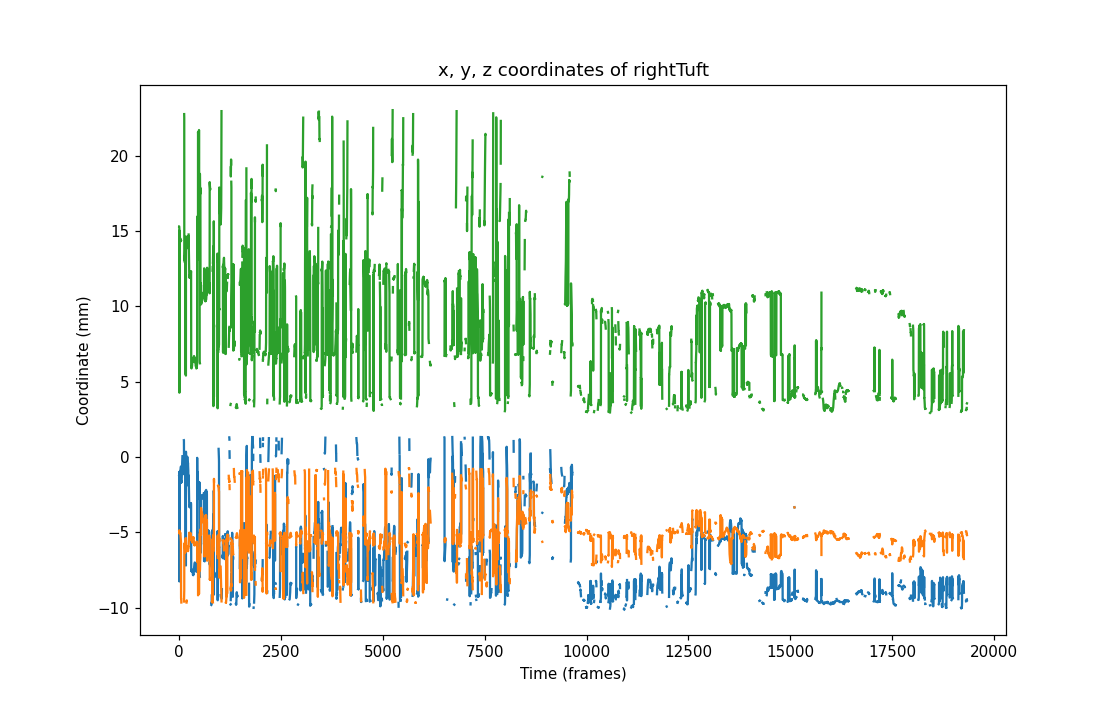

Text(0.5, 1.0, 'x, y, z coordinates of rightTuft')

In [21]:
# plot the x, y, z coordinates of joint 1

import matplotlib.pyplot as plt
%matplotlib notebook

plt.figure(figsize=(9.4, 6))
plt.plot(bodyparts_3d_anipose[('weikang','dodson','rightTuft','x')])
plt.plot(bodyparts_3d_anipose[('weikang','dodson','rightTuft','y')])
plt.plot(bodyparts_3d_anipose[('weikang','dodson','rightTuft','z')])
plt.xlabel("Time (frames)")
plt.ylabel("Coordinate (mm)")
plt.title("x, y, z coordinates of {}".format('rightTuft'))

In [22]:
## plot the example videos

import sys
sys.path.append('/home/ws523/marmoset_tracking_DLCv2/following_up_analysis/3d_recontruction_analysis_self_and_coop_task/ana_functions')
from tracking_video_3d_demo import tracking_video_3d_demo

animalnames_videotrack = ['dodson','scorch']
bodypartnames_videotrack = ['rightTuft','whiteBlaze','leftTuft','rightEye','leftEye','mouth','lever','tube','boxCorner1','boxCorner2','boxCorner3','boxCorner4']
animal1_filename = animal1
animal2_filename = animal2
session_start_time = 1.00
fps = 30
nframes = 2*fps

withboxCorner = 1

current_dir = os.getcwd()
add_date_dir = current_dir+'/anipose_3d_demo_videos/'+date_tgt+'_'+animal1_filename+'_'+animal2_filename
if not os.path.exists(add_date_dir):
    os.makedirs(add_date_dir)
video_file = add_date_dir+'/'+date_tgt+'_'+animal1_filename+'_'+animal2_filename+'_anipose_3d_tracking_demo.mp4'

tracking_video_3d_demo(bodyparts_3d_anipose['weikang'],animalnames_videotrack,bodypartnames_videotrack,date_tgt,animal1_filename,animal2_filename,session_start_time,fps,nframes,video_file,withboxCorner)

KeyError: 'boxCorner1'

<IPython.core.display.Javascript object>


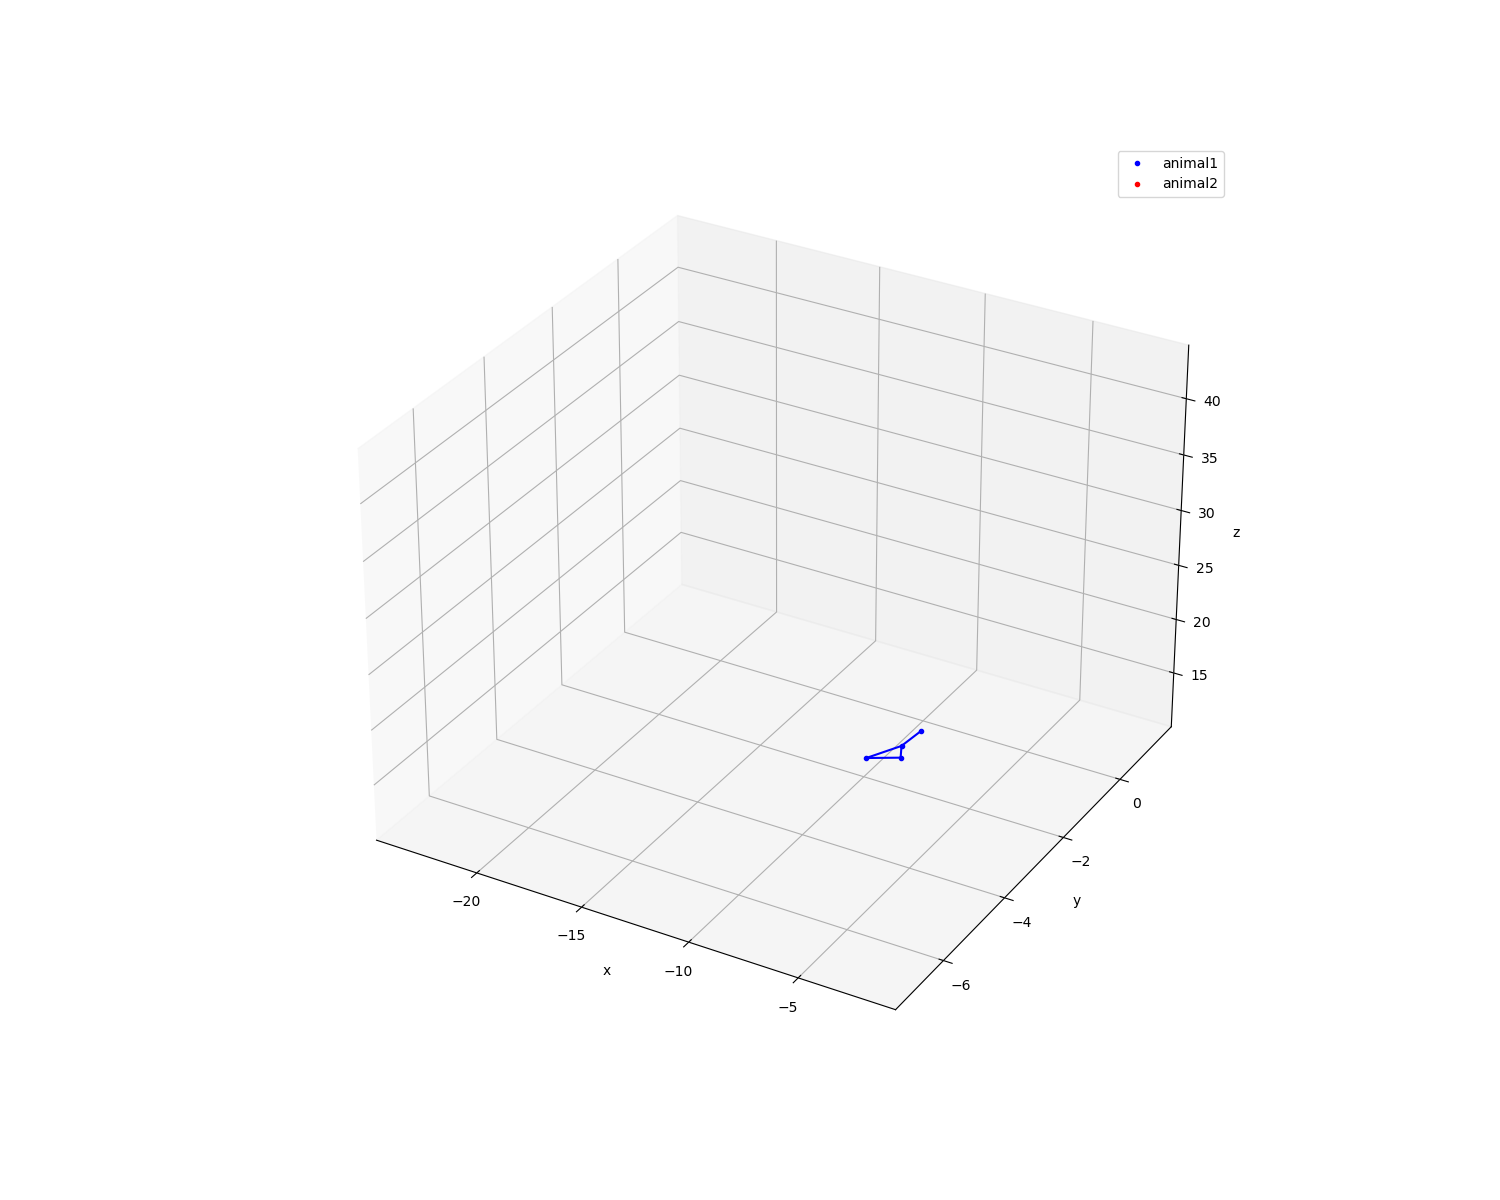

printing frame  31 / 1830
printing frame  32 / 1830
printing frame  33 / 1830
printing frame  34 / 1830
printing frame  35 / 1830
printing frame  36 / 1830
printing frame  37 / 1830
printing frame  38 / 1830
printing frame  39 / 1830
printing frame  40 / 1830
printing frame  41 / 1830
printing frame  42 / 1830
printing frame  43 / 1830
printing frame  44 / 1830
printing frame  45 / 1830
printing frame  46 / 1830
printing frame  47 / 1830
printing frame  48 / 1830
printing frame  49 / 1830
printing frame  50 / 1830
printing frame  51 / 1830
printing frame  52 / 1830
printing frame  53 / 1830
printing frame  54 / 1830
printing frame  55 / 1830
printing frame  56 / 1830
printing frame  57 / 1830
printing frame  58 / 1830
printing frame  59 / 1830
printing frame  60 / 1830
printing frame  61 / 1830
printing frame  62 / 1830
printing frame  63 / 1830
printing frame  64 / 1830
printing frame  65 / 1830
printing frame  66 / 1830
printing frame  67 / 1830
printing frame  68 / 1830
printing fra

printing frame  337 / 1830
printing frame  338 / 1830
printing frame  339 / 1830
printing frame  340 / 1830
printing frame  341 / 1830
printing frame  342 / 1830
printing frame  343 / 1830
printing frame  344 / 1830
printing frame  345 / 1830
printing frame  346 / 1830
printing frame  347 / 1830
printing frame  348 / 1830
printing frame  349 / 1830
printing frame  350 / 1830
printing frame  351 / 1830
printing frame  352 / 1830
printing frame  353 / 1830
printing frame  354 / 1830
printing frame  355 / 1830
printing frame  356 / 1830
printing frame  357 / 1830
printing frame  358 / 1830
printing frame  359 / 1830
printing frame  360 / 1830
printing frame  361 / 1830
printing frame  362 / 1830
printing frame  363 / 1830
printing frame  364 / 1830
printing frame  365 / 1830
printing frame  366 / 1830
printing frame  367 / 1830
printing frame  368 / 1830
printing frame  369 / 1830
printing frame  370 / 1830
printing frame  371 / 1830
printing frame  372 / 1830
printing frame  373 / 1830
p

printing frame  944 / 1830
printing frame  945 / 1830
printing frame  946 / 1830
printing frame  947 / 1830
printing frame  948 / 1830
printing frame  949 / 1830
printing frame  950 / 1830
printing frame  951 / 1830
printing frame  952 / 1830
printing frame  953 / 1830
printing frame  954 / 1830
printing frame  955 / 1830
printing frame  956 / 1830
printing frame  957 / 1830
printing frame  958 / 1830
printing frame  959 / 1830
printing frame  960 / 1830
printing frame  961 / 1830
printing frame  962 / 1830
printing frame  963 / 1830
printing frame  964 / 1830
printing frame  965 / 1830
printing frame  966 / 1830
printing frame  967 / 1830
printing frame  968 / 1830
printing frame  969 / 1830
printing frame  970 / 1830
printing frame  971 / 1830
printing frame  972 / 1830
printing frame  973 / 1830
printing frame  974 / 1830
printing frame  975 / 1830
printing frame  976 / 1830
printing frame  977 / 1830
printing frame  978 / 1830
printing frame  979 / 1830
printing frame  980 / 1830
p

printing frame  1239 / 1830
printing frame  1240 / 1830
printing frame  1241 / 1830
printing frame  1242 / 1830
printing frame  1243 / 1830
printing frame  1244 / 1830
printing frame  1245 / 1830
printing frame  1246 / 1830
printing frame  1247 / 1830
printing frame  1248 / 1830
printing frame  1249 / 1830
printing frame  1250 / 1830
printing frame  1251 / 1830
printing frame  1252 / 1830
printing frame  1253 / 1830
printing frame  1254 / 1830
printing frame  1255 / 1830
printing frame  1256 / 1830
printing frame  1257 / 1830
printing frame  1258 / 1830
printing frame  1259 / 1830
printing frame  1260 / 1830
printing frame  1261 / 1830
printing frame  1262 / 1830
printing frame  1263 / 1830
printing frame  1264 / 1830
printing frame  1265 / 1830
printing frame  1266 / 1830
printing frame  1267 / 1830
printing frame  1268 / 1830
printing frame  1269 / 1830
printing frame  1270 / 1830
printing frame  1271 / 1830
printing frame  1272 / 1830
printing frame  1273 / 1830
printing frame  1274

printing frame  1532 / 1830
printing frame  1533 / 1830
printing frame  1534 / 1830
printing frame  1535 / 1830
printing frame  1536 / 1830
printing frame  1537 / 1830
printing frame  1538 / 1830
printing frame  1539 / 1830
printing frame  1540 / 1830
printing frame  1541 / 1830
printing frame  1542 / 1830
printing frame  1543 / 1830
printing frame  1544 / 1830
printing frame  1545 / 1830
printing frame  1546 / 1830
printing frame  1547 / 1830
printing frame  1548 / 1830
printing frame  1549 / 1830
printing frame  1550 / 1830
printing frame  1551 / 1830
printing frame  1552 / 1830
printing frame  1553 / 1830
printing frame  1554 / 1830
printing frame  1555 / 1830
printing frame  1556 / 1830
printing frame  1557 / 1830
printing frame  1558 / 1830
printing frame  1559 / 1830
printing frame  1560 / 1830
printing frame  1561 / 1830
printing frame  1562 / 1830
printing frame  1563 / 1830
printing frame  1564 / 1830
printing frame  1565 / 1830
printing frame  1566 / 1830
printing frame  1567

printing frame  1825 / 1830
printing frame  1826 / 1830
printing frame  1827 / 1830
printing frame  1828 / 1830
printing frame  1829 / 1830
printing frame  1830 / 1830


<IPython.core.display.Javascript object>


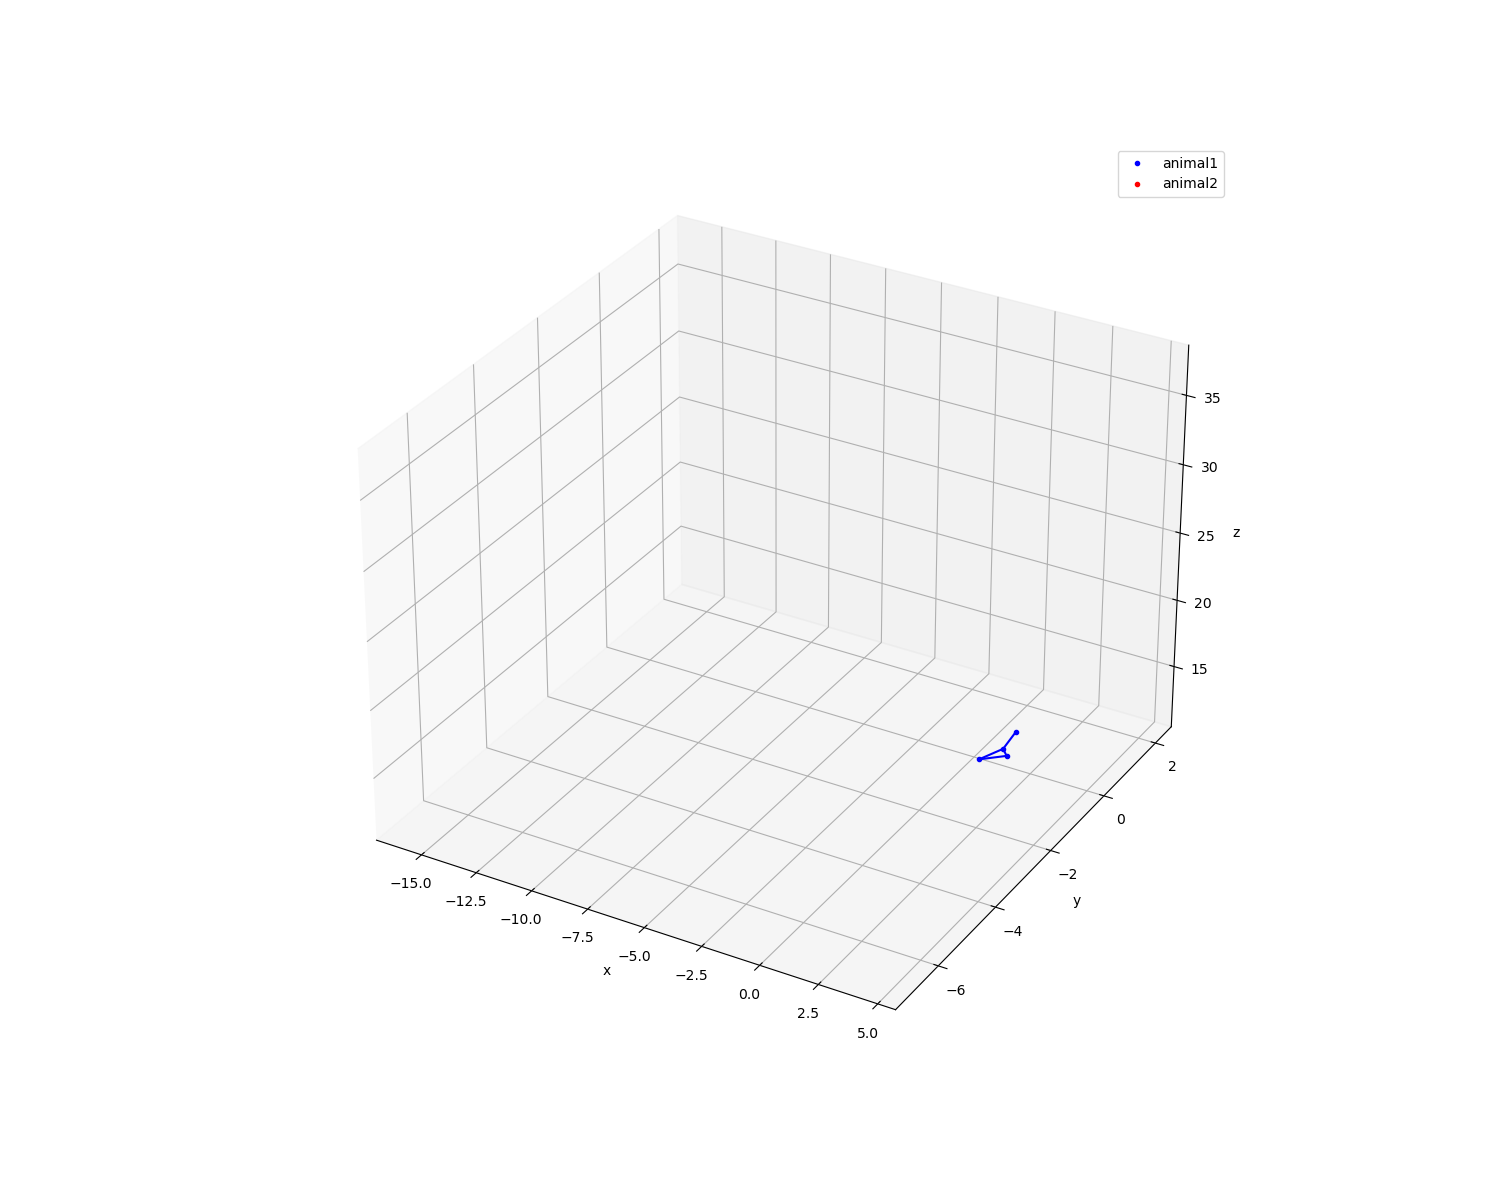

printing frame  31 / 1830
printing frame  32 / 1830
printing frame  33 / 1830
printing frame  34 / 1830
printing frame  35 / 1830
printing frame  36 / 1830
printing frame  37 / 1830
printing frame  38 / 1830
printing frame  39 / 1830
printing frame  40 / 1830
printing frame  41 / 1830
printing frame  42 / 1830
printing frame  43 / 1830
printing frame  44 / 1830
printing frame  45 / 1830
printing frame  46 / 1830
printing frame  47 / 1830
printing frame  48 / 1830
printing frame  49 / 1830
printing frame  50 / 1830
printing frame  51 / 1830
printing frame  52 / 1830
printing frame  53 / 1830
printing frame  54 / 1830
printing frame  55 / 1830
printing frame  56 / 1830
printing frame  57 / 1830
printing frame  58 / 1830
printing frame  59 / 1830
printing frame  60 / 1830
printing frame  61 / 1830
printing frame  62 / 1830
printing frame  63 / 1830
printing frame  64 / 1830
printing frame  65 / 1830
printing frame  66 / 1830
printing frame  67 / 1830
printing frame  68 / 1830
printing fra

printing frame  337 / 1830
printing frame  338 / 1830
printing frame  339 / 1830
printing frame  340 / 1830
printing frame  341 / 1830
printing frame  342 / 1830
printing frame  343 / 1830
printing frame  344 / 1830
printing frame  345 / 1830
printing frame  346 / 1830
printing frame  347 / 1830
printing frame  348 / 1830
printing frame  349 / 1830
printing frame  350 / 1830
printing frame  351 / 1830
printing frame  352 / 1830
printing frame  353 / 1830
printing frame  354 / 1830
printing frame  355 / 1830
printing frame  356 / 1830
printing frame  357 / 1830
printing frame  358 / 1830
printing frame  359 / 1830
printing frame  360 / 1830
printing frame  361 / 1830
printing frame  362 / 1830
printing frame  363 / 1830
printing frame  364 / 1830
printing frame  365 / 1830
printing frame  366 / 1830
printing frame  367 / 1830
printing frame  368 / 1830
printing frame  369 / 1830
printing frame  370 / 1830
printing frame  371 / 1830
printing frame  372 / 1830
printing frame  373 / 1830
p

printing frame  641 / 1830
printing frame  642 / 1830
printing frame  643 / 1830
printing frame  644 / 1830
printing frame  645 / 1830
printing frame  646 / 1830
printing frame  647 / 1830
printing frame  648 / 1830
printing frame  649 / 1830
printing frame  650 / 1830
printing frame  651 / 1830
printing frame  652 / 1830
printing frame  653 / 1830
printing frame  654 / 1830
printing frame  655 / 1830
printing frame  656 / 1830
printing frame  657 / 1830
printing frame  658 / 1830
printing frame  659 / 1830
printing frame  660 / 1830
printing frame  661 / 1830
printing frame  662 / 1830
printing frame  663 / 1830
printing frame  664 / 1830
printing frame  665 / 1830
printing frame  666 / 1830
printing frame  667 / 1830
printing frame  668 / 1830
printing frame  669 / 1830
printing frame  670 / 1830
printing frame  671 / 1830
printing frame  672 / 1830
printing frame  673 / 1830
printing frame  674 / 1830
printing frame  675 / 1830
printing frame  676 / 1830
printing frame  677 / 1830
p

printing frame  945 / 1830
printing frame  946 / 1830
printing frame  947 / 1830
printing frame  948 / 1830
printing frame  949 / 1830
printing frame  950 / 1830
printing frame  951 / 1830
printing frame  952 / 1830
printing frame  953 / 1830
printing frame  954 / 1830
printing frame  955 / 1830
printing frame  956 / 1830
printing frame  957 / 1830
printing frame  958 / 1830
printing frame  959 / 1830
printing frame  960 / 1830
printing frame  961 / 1830
printing frame  962 / 1830
printing frame  963 / 1830
printing frame  964 / 1830
printing frame  965 / 1830
printing frame  966 / 1830
printing frame  967 / 1830
printing frame  968 / 1830
printing frame  969 / 1830
printing frame  970 / 1830
printing frame  971 / 1830
printing frame  972 / 1830
printing frame  973 / 1830
printing frame  974 / 1830
printing frame  975 / 1830
printing frame  976 / 1830
printing frame  977 / 1830
printing frame  978 / 1830
printing frame  979 / 1830
printing frame  980 / 1830
printing frame  981 / 1830
p

printing frame  1240 / 1830
printing frame  1241 / 1830
printing frame  1242 / 1830
printing frame  1243 / 1830
printing frame  1244 / 1830
printing frame  1245 / 1830
printing frame  1246 / 1830
printing frame  1247 / 1830
printing frame  1248 / 1830
printing frame  1249 / 1830
printing frame  1250 / 1830
printing frame  1251 / 1830
printing frame  1252 / 1830
printing frame  1253 / 1830
printing frame  1254 / 1830
printing frame  1255 / 1830
printing frame  1256 / 1830
printing frame  1257 / 1830
printing frame  1258 / 1830
printing frame  1259 / 1830
printing frame  1260 / 1830
printing frame  1261 / 1830
printing frame  1262 / 1830
printing frame  1263 / 1830
printing frame  1264 / 1830
printing frame  1265 / 1830
printing frame  1266 / 1830
printing frame  1267 / 1830
printing frame  1268 / 1830
printing frame  1269 / 1830
printing frame  1270 / 1830
printing frame  1271 / 1830
printing frame  1272 / 1830
printing frame  1273 / 1830
printing frame  1274 / 1830
printing frame  1275

printing frame  1533 / 1830
printing frame  1534 / 1830
printing frame  1535 / 1830
printing frame  1536 / 1830
printing frame  1537 / 1830
printing frame  1538 / 1830
printing frame  1539 / 1830
printing frame  1540 / 1830
printing frame  1541 / 1830
printing frame  1542 / 1830
printing frame  1543 / 1830
printing frame  1544 / 1830
printing frame  1545 / 1830
printing frame  1546 / 1830
printing frame  1547 / 1830
printing frame  1548 / 1830
printing frame  1549 / 1830
printing frame  1550 / 1830
printing frame  1551 / 1830
printing frame  1552 / 1830
printing frame  1553 / 1830
printing frame  1554 / 1830
printing frame  1555 / 1830
printing frame  1556 / 1830
printing frame  1557 / 1830
printing frame  1558 / 1830
printing frame  1559 / 1830
printing frame  1560 / 1830
printing frame  1561 / 1830
printing frame  1562 / 1830
printing frame  1563 / 1830
printing frame  1564 / 1830
printing frame  1565 / 1830
printing frame  1566 / 1830
printing frame  1567 / 1830
printing frame  1568

printing frame  1826 / 1830
printing frame  1827 / 1830
printing frame  1828 / 1830
printing frame  1829 / 1830
printing frame  1830 / 1830


In [50]:
## plot the example videos
## for comparison make the video based on DLC's own 3d recontruction

twocamera_videos_cam12 = "/gpfs/gibbs/pi/jadi/VideoTracker_SocialInter/test_video_cooperative_task_3d/"+date_tgt+"_"+animal1+"_"+animal2+"_camera12/"
twocamera_videos_cam23 = "/gpfs/gibbs/pi/jadi/VideoTracker_SocialInter/test_video_cooperative_task_3d/"+date_tgt+"_"+animal1+"_"+animal2+"_camera23/"

bodyparts_cam1_cam12 = twocamera_videos_cam12+date_tgt+"_"+animal1+"_"+animal2+"_camera-1"+singlecam_ana_type+"_el_filtered.h5"
bodyparts_cam2_cam12 = twocamera_videos_cam12+date_tgt+"_"+animal1+"_"+animal2+"_camera-2"+singlecam_ana_type+"_el_filtered.h5"
bodyparts_cam3_cam23 = twocamera_videos_cam23+date_tgt+"_"+animal1+"_"+animal2+"_camera-3"+singlecam_ana_type+"_el_filtered.h5"

bodyparts_3d_cam12_DLC = twocamera_videos_cam12+date_tgt+"_"+animal1+"_"+animal2+"_weikang.h5"
bodyparts_3d_cam23_DLC = twocamera_videos_cam23+date_tgt+"_"+animal1+"_"+animal2+"_weikang.h5"

singlecam_ana_type = "DLC_dlcrnetms5_marmoset_tracking_with_middle_cameraSep1shuffle1_150000"

bodyparts_3d_cam12_DLC_data = pd.read_hdf(bodyparts_3d_cam12_DLC)
bodyparts_3d_cam23_DLC_data = pd.read_hdf(bodyparts_3d_cam23_DLC)


# camera 12 pair

import sys
sys.path.append('/home/ws523/marmoset_tracking_DLCv2/following_up_analysis/3d_recontruction_analysis_self_and_coop_task/ana_functions')
from tracking_video_3d_demo import tracking_video_3d_demo

animalnames_videotrack = ['dodson','scorch']
bodypartnames_videotrack = ['rightTuft','whiteBlaze','leftTuft','rightEye','leftEye','mouth']
animal1_filename = animal1
animal2_filename = animal2
session_start_time = 1.00
fps = 30
nframes = 60*fps

withboxCorner = 0

current_dir = os.getcwd()
add_date_dir = current_dir+'/DLC_cam12_3d_demo_videos/'+date_tgt+'_'+animal1_filename+'_'+animal2_filename
if not os.path.exists(add_date_dir):
    os.makedirs(add_date_dir)
video_file = add_date_dir+'/'+date_tgt+'_'+animal1_filename+'_'+animal2_filename+'_DLCcam12_3d_tracking_demo.mp4'

tracking_video_3d_demo(bodyparts_3d_cam12_DLC_data['weikang'],animalnames_videotrack,bodypartnames_videotrack,date_tgt,animal1_filename,animal2_filename,session_start_time,fps,nframes,video_file,withboxCorner)



# camera 23 pair

import sys
sys.path.append('/home/ws523/marmoset_tracking_DLCv2/following_up_analysis/3d_recontruction_analysis_self_and_coop_task/ana_functions')
from tracking_video_3d_demo import tracking_video_3d_demo

animalnames_videotrack = ['dodson','scorch']
bodypartnames_videotrack = ['rightTuft','whiteBlaze','leftTuft','rightEye','leftEye','mouth']
animal1_filename = animal1
animal2_filename = animal2
session_start_time = 1.00
fps = 30
nframes = 60*fps

withboxCorner = 0

current_dir = os.getcwd()
add_date_dir = current_dir+'/DLC_cam23_3d_demo_videos/'+date_tgt+'_'+animal1_filename+'_'+animal2_filename
if not os.path.exists(add_date_dir):
    os.makedirs(add_date_dir)
video_file = add_date_dir+'/'+date_tgt+'_'+animal1_filename+'_'+animal2_filename+'_DLCcam23_3d_tracking_demo.mp4'

tracking_video_3d_demo(bodyparts_3d_cam23_DLC_data['weikang'],animalnames_videotrack,bodypartnames_videotrack,date_tgt,animal1_filename,animal2_filename,session_start_time,fps,nframes,video_file,withboxCorner)







